# Code

### Please find the 3 correct/incorrect predictions of the best model at the end of this Jupyter notebook!

### One-time loading of data from text files

In [1]:
import os
import random
import spacy
import string
from os import listdir
import pickle as pkl
import torch
import matplotlib
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
'''
Data loading code inspired from: https://machinelearningmastery.com/prepare-movie-review-data-sentiment-analysis/
'''

# load doc into memory
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text
 
# load all docs in a directory
def process_docs(directory, data):
    # walk through all files in the folder
    i = 0
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load document
        data.append(load_doc(path))
        i += 1
    print("Loaded {} files from {}".format(i, directory))
    return i

In [ ]:
TRAIN_DATA_DIR = '/Users/vrajiv/Desktop/NLP Class/lab3/aclImdb/train/'
TEST_DATA_DIR = '/Users/vrajiv/Desktop/NLP Class/lab3/aclImdb/test/'
TRAIN_VAL_SPLIT = 20000
SEED = 1

full_train_data = []

num_pos = process_docs(TRAIN_DATA_DIR + 'pos', full_train_data)
num_neg = process_docs(TRAIN_DATA_DIR + 'neg', full_train_data)

full_train_labels = [0] * (num_pos + num_neg)
for i in range(num_pos):
    full_train_labels[i] = 1

# randomly shuffle data 
# do it for labels as well, so they get shuffled the same way
random.Random(SEED).shuffle(full_train_data)
random.Random(SEED).shuffle(full_train_labels)

# Split train data into actual train and validation sets
train_data = full_train_data[:TRAIN_VAL_SPLIT]
val_data = full_train_data[TRAIN_VAL_SPLIT:]

# Same for labels
train_labels = full_train_labels[:TRAIN_VAL_SPLIT]
val_labels = full_train_labels[TRAIN_VAL_SPLIT:]

print("Total length of train data: {}".format(len(train_data)))
print("Total length of validation data: {}".format(len(val_data)))


###
### TEST DATA 
###

test_data = []

num_pos = process_docs(TEST_DATA_DIR + 'pos', test_data)
num_neg = process_docs(TEST_DATA_DIR + 'neg', test_data)

test_labels = [0] * (num_pos + num_neg)
for i in range(num_pos):
    test_labels[i] = 1

# randomly shuffle data
random.Random(SEED).shuffle(test_data)
random.Random(SEED).shuffle(test_labels)
print("Total length of test data: {}".format(len(test_data)))

In [ ]:
# verify that labels (sentiment) and reviews match in train data. 
def verify_match(data, labels):
    rand_seed = random.randint(1, 101)
    print(random.Random(rand_seed).choice(data))
    print(random.Random(rand_seed).choice(labels))

In [ ]:
verify_match(train_data, train_labels)

In [ ]:
verify_match(val_data, val_labels)

### Storing train/val/test as lists -- pickle

In [ ]:
# Uncomment if running the above code!

# with open('movie_review_train_data.p', 'wb') as f:
#     pkl.dump(train_data, f)
    
# with open('movie_review_train_labels.p', 'wb') as f:
#     pkl.dump(train_labels, f)
    
# with open('movie_review_val_data.p', 'wb') as f:
#     pkl.dump(val_data, f)
    
# with open('movie_review_val_labels.p', 'wb') as f:
#     pkl.dump(val_labels, f)
    
# with open('movie_review_test_data.p', 'wb') as f:
#     pkl.dump(test_data, f)
    
# with open('movie_review_test_labels.p', 'wb') as f:
#     pkl.dump(test_labels, f)

### Fetching train/val/test data -- pickle

In [2]:
train_data = pkl.load(open("movie_review_train_data.p", "rb"))
train_labels = pkl.load(open("movie_review_train_labels.p", "rb"))
val_data = pkl.load(open("movie_review_val_data.p", "rb"))
val_labels = pkl.load(open("movie_review_val_labels.p", "rb"))
test_data = pkl.load(open("movie_review_test_data.p", "rb"))
test_labels = pkl.load(open("movie_review_test_labels.p", "rb"))

In [4]:
random.choice(train_data)

"This definitely is NOT the intellectual film with profound mission, so I really don't think there is too much not to understand to in case you aren't Czech.<br /><br />It's just a comedy. The humor is simple, pretty funny and sometimes, maybe, little morbid. Some actors and characters are very similar to Samotári (2000) (Jirí Machácek, Ivan Trojan, Vladimír Dlouhý) so the authors are. But it doesn't matter, the genre is really different and these two films shouldn't be compared in this way. Jedna ruka netleská won't try to give you a lesson, it will try to make you laugh and there is some chance it will succeed.<br /><br />Not bad film, not the ingenious one, but I enjoyed it. Some scenes are truly worth seeing."

### Tokenization (standard scheme from lab + 2nd scheme: remove stop words)

In [5]:
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation as well as stop words (for 2nd tokenization scheme
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations and token.text not in STOP_WORDS)]

# Example
tokens = tokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'looking', 'buying', 'u.k.', 'startup', '1', 'billion']


### Tokenizing datasets takes 30-40 min, so only uncomment if need to re-tokenize data

In [6]:
def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# # val set tokens
# print ("Tokenizing val data")
# val_data_tokens, _ = tokenize_dataset(val_data)
# pkl.dump(val_data_tokens, open("movie_review_val_data_tokens.p", "wb"))

# # test set tokens
# print ("Tokenizing test data")
# test_data_tokens, _ = tokenize_dataset(test_data)
# pkl.dump(test_data_tokens, open("movie_review_test_data_tokens.p", "wb"))

# # train set tokens
# print ("Tokenizing train data")
# train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
# pkl.dump(train_data_tokens, open("movie_review_train_data_tokens.p", "wb"))
# pkl.dump(all_train_tokens, open("movie_review_all_train_tokens.p", "wb"))

###
### REMOVING STOP WORDS
###

# # # val set tokens
# print ("Tokenizing val data")
# val_data_tokens, _ = tokenize_dataset(val_data)
# pkl.dump(val_data_tokens, open("movie_review_val_data_tokens_stop_words.p", "wb"))

# # # test set tokens
# print ("Tokenizing test data")
# test_data_tokens, _ = tokenize_dataset(test_data)
# pkl.dump(test_data_tokens, open("movie_review_test_data_tokens_stop_words.p", "wb"))

# # # train set tokens
# print ("Tokenizing train data")
# train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
# pkl.dump(train_data_tokens, open("movie_review_train_data_tokens_stop_words.p", "wb"))
# pkl.dump(all_train_tokens, open("movie_review_all_train_tokens_stop_words.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


### Loading tokenized datasets -- train/val/test

In [168]:
# Uncomment for standard tokenization scheme from lab!

# train_data_tokens = pkl.load(open("movie_review_train_data_tokens.p", "rb"))
# all_train_tokens = pkl.load(open("movie_review_all_train_tokens.p", "rb"))
# val_data_tokens = pkl.load(open("movie_review_val_data_tokens.p", "rb"))
# test_data_tokens = pkl.load(open("movie_review_test_data_tokens.p", "rb"))

### STOP WORDS -- Uncomment for tokenization scheme 2

train_data_tokens = pkl.load(open("movie_review_train_data_tokens_stop_words.p", "rb"))
all_train_tokens = pkl.load(open("movie_review_all_train_tokens_stop_words.p", "rb"))
val_data_tokens = pkl.load(open("movie_review_val_data_tokens_stop_words.p", "rb"))
test_data_tokens = pkl.load(open("movie_review_test_data_tokens_stop_words.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 2519291


### Build vocabulary from most common tokens
#### Includes two functions to generate n-grams only and n-grams inclusive

In [71]:
from collections import Counter
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

'''
Inspired from: http://locallyoptimal.com/blog/2013/01/20/elegant-n-gram-generation-in-python/
'''
def generate_bag_ngrams(n, tokens):
    return zip(*[tokens[i:] for i in range(n)])

def generate_list_ngrams_inclusive(n, tokens):
    ret = []
    for i in range(n):
        ret = ret + list(generate_bag_ngrams(i+1, tokens))
    return ret

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(VOCAB_SIZE))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

### "One-hot encoding"
#### Represent each movie review as a vector of indices in our vocabulary

In [72]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data 

### Defining PyTorch Data Loader

In [73]:
MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class MovieReviewDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of movie review tokens 
        @param target_list: list of movie review targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def moviereview_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

### Defining Bag-of-Ngrams model in PyTorch

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # Apply the linear function to get our logit (real numbers)
        logit = self.linear(out.float())
        
        return logit

In [167]:
# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

def train_model(model,
              lr = 0.005, 
              num_epochs = 4, 
              criterion = nn.CrossEntropyLoss()):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr) # wd: linear
    
    # Uncomment for linear annealing of learning rate
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
    losses = []
    xs = 0
    val_accs = []
    for epoch in range(num_epochs):
#         outside_loss = 0
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            outside_loss = loss
            losses.append(loss)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                xs = xs + 100
                val_accs.append(val_acc)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
#         scheduler.step(outside_loss)
    return losses, xs, val_accs

## Full model run in one script (for quick hyperparameter tuning)

In [169]:
VOCAB_SIZE = 50000
NGRAM_SIZE = 3
EMBED_DIM = 300
LEARNING_RATE = 0.005
NUM_EPOCHS = 4

# Building the vocabulary for n-gram only
# Uncomment for n-gram only

# token2id, id2token = build_vocab(generate_bag_ngrams(NGRAM_SIZE, all_train_tokens))

# Building the vocabulary for n-gram inclusive
# Uncomment for n-gram inclusive

token2id, id2token = build_vocab(generate_list_ngrams_inclusive(NGRAM_SIZE, all_train_tokens))

# Check the dictionary by loading a random token from it
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]
print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

# Representing each movie review in train/val/test as a bag-of-ngrams
# Uncomment for n-gram only. 

# ngram_train_data_tokens = [list(generate_bag_ngrams(NGRAM_SIZE, review)) for review in train_data_tokens]
# ngram_val_data_tokens = [list(generate_bag_ngrams(NGRAM_SIZE, review)) for review in val_data_tokens]
# ngram_test_data_tokens = [list(generate_bag_ngrams(NGRAM_SIZE, review)) for review in test_data_tokens]

# Uncomment for n-gram inclusive (<= n).
ngram_train_data_tokens = [generate_list_ngrams_inclusive(NGRAM_SIZE, review) for review in train_data_tokens]
ngram_val_data_tokens = [generate_list_ngrams_inclusive(NGRAM_SIZE, review) for review in val_data_tokens]
ngram_test_data_tokens = [generate_list_ngrams_inclusive(NGRAM_SIZE, review) for review in test_data_tokens]

# "One-hot encoding"
train_data_indices = token2index_dataset(ngram_train_data_tokens)
val_data_indices = token2index_dataset(ngram_val_data_tokens)
test_data_indices = token2index_dataset(ngram_test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

BATCH_SIZE = 32
train_dataset = MovieReviewDataset(train_data_indices, train_labels)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE, 
                                           collate_fn=moviereview_collate_func,
                                           shuffle=True)

val_dataset = MovieReviewDataset(val_data_indices, val_labels)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=moviereview_collate_func,
                                           shuffle=True)

test_dataset = MovieReviewDataset(test_data_indices, test_labels)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=moviereview_collate_func,
                                           shuffle=False)

for i, (data, lengths, labels) in enumerate(train_loader):
    print (data)
    print(lengths)
    print (labels)
    break

Token id 27674 ; token ('vendetta',)
Token ('vendetta',); token id 27674
Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
tensor([[   10,     3,    16,  ...,     0,     0,     0],
        [ 6777,  7221,   616,  ...,     0,     0,     0],
        [    2,   165,    58,  ..., 21625,  3324,  4639],
        ...,
        [    2,     8,   939,  ...,     1,     1,  4653],
        [  299, 10717,    25,  ...,     1,     1,     1],
        [   44,  5421,   536,  ...,  4549,   439,  4502]])
tensor([183, 183, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 198, 200,
        165, 200, 200, 200, 200, 200, 105, 200, 200, 200, 200, 200, 200, 200,
        200, 200, 200, 200])
tensor([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0])


In [170]:
model = BagOfWords(len(id2token), EMBED_DIM)

losses, xs, val_accs = train_model(model,
          lr = LEARNING_RATE, 
          num_epochs = NUM_EPOCHS, 
          criterion = nn.CrossEntropyLoss())

Epoch: [1/4], Step: [101/625], Validation Acc: 76.84
Epoch: [1/4], Step: [201/625], Validation Acc: 83.64
Epoch: [1/4], Step: [301/625], Validation Acc: 87.2
Epoch: [1/4], Step: [401/625], Validation Acc: 88.02
Epoch: [1/4], Step: [501/625], Validation Acc: 88.66
Epoch: [1/4], Step: [601/625], Validation Acc: 88.44
Epoch: [2/4], Step: [101/625], Validation Acc: 89.62
Epoch: [2/4], Step: [201/625], Validation Acc: 89.7
Epoch: [2/4], Step: [301/625], Validation Acc: 88.94
Epoch: [2/4], Step: [401/625], Validation Acc: 89.02


KeyboardInterrupt: 

### Plotting training (loss) and validation (accuracy) curves

Text(0,0.5,'Val Acc')

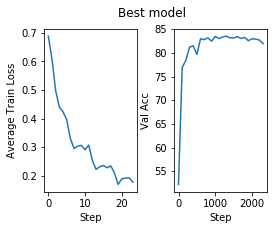

In [171]:
fig = plt.figure(figsize=(4, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

loss_avg_vals = []
for i in range(0, len(losses)-100, 100):
    s = 0
    avg = 0
    for j in range(i, i+100):
        s += losses[j]
    avg = s/100.0
    loss_avg_vals.append(avg)
    
plt.suptitle("Best model")
plt.subplot(1, 2, 1)
plt.plot(range(len(loss_avg_vals)), loss_avg_vals)
plt.xlabel('Step')
plt.ylabel('Average Train Loss')

plt.subplot(1, 2, 2)
plt.plot(range(0, xs, 100), val_accs)
plt.xlabel('Step')
plt.ylabel('Val Acc')

### Finding 3 correct and 3 incorrect predictions

In [174]:
model.eval()

eval_dataset = MovieReviewDataset(val_data_indices, val_labels)
eval_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                          batch_size=1,
                                          collate_fn=moviereview_collate_func,
                                          shuffle=False)

i = 0
incorrect_data = []
correct_data = []
corr_count = 0
incorr_count = 0
for data, lengths, labels in eval_loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        if (predicted.squeeze().item() == labels.squeeze().item() and corr_count <= 2):
            corr_count += 1
            correct_data.append(val_data[i])
            print("correct: ", labels.squeeze().item())
        elif (predicted.squeeze().item() != labels.squeeze().item() and incorr_count <= 2):
            incorr_count += 1
            incorrect_data.append(val_data[i])
            print("incorrect: ", labels.squeeze().item())
        i += 1
        
        if corr_count == 3 and incorr_count == 3:
            break       

correct:  0
correct:  1
correct:  1
incorrect:  0
incorrect:  1
incorrect:  1


### Reviews classified correctly: 0, 1, 1

In [175]:
for i in range(len(correct_data)):
    print(correct_data[i] + '\n')

This series has its ups and occasional downs, and the latter is the case, here. There's an agreeable amount of spatter, with an inventive implementation of the Baby Cart's weapons, but the editing film is a seriously disjointed, the film-making itself rougher than usual. At times, the action slows to a crawl as the camera follows the wordless wanderings of the "cub," who nearly gets lost early on. All in all, disappointment.<br /><br />That said, there's a spaghetti eastern quality to the music and action that may win the approval of dedicated viewers. This installment spends much of its time following the minor misadventures of the little boy, who begins to stare into the abyss of death his father opened for him.

Following the brilliant "Goyôkiba" (aka. "Hanzo The Razor - Sword Of Justice", 1972) and its excellent (and even sleazier) sequel "Goyôkiba: Kamisori Hanzô jigoku zeme" (aka. "Razor 2: The Snare", 1973), this "Goyôkiba: Oni no Hanzô yawahada koban" aka. "Razor 3: Who's Got T

### Reviews classified incorrectly : correct labels are 0, 1, 1

In [177]:
for i in range(len(incorrect_data)):
    print(incorrect_data[i] + '\n')

I saw this movie at the AFI Dallas festival. Most of the audience, including my wife, enjoyed this comedy-drama, but I didn't. It stars Lucas Haas (Brick, Alpha Dog), Molly Parker (Kissed, The Five Senses, Hollywoodland) and Adam Scott (First Snow, Art School Confidential). The director is Matt Bissonnette, who's married to Molly Parker. All three actors do a fine job in this movie about 3 friends, the marriage of two of them and infidelity involving the third. It all takes place at a lake house and it looks wonderful. The film wants to treat its subject as a comedy first and then a drama, and I thought it needed to be the other way around.

As Most Off You Might off Seen Star Wars: Return Off The Jedi You May Knows Its A Good Movie But As You Might Have Seen On Video They M|might have a party At The end And They Just Probably End The Movie with the party with no a spirits or anything But on the original one (Live TV) When they are Partying But before i say more when Ben obi-wan dies i

In [140]:
print ("After training for {} epochs".format(NUM_EPOCHS))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

After training for 4 epochs
Val Acc 90.12
Test Acc 87.724
